In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

Raiz = 'C:/Users/LAURA/Documents/Proyecto/'
Name2 = 'RESPEL_2016'
Name3 = 'RESPEL_2017'
Name4 = 'RESPEL_2019'

In [2]:
RESPEL16 = pd.read_excel(Raiz+Name2+'.xlsx')
print(f"Shape of data RESPEL 2016: {RESPEL16.shape}")
print(f"Number of missing values in the data RESPEL 2016: {RESPEL16.isnull().sum().sum()}")
RESPEL17 = pd.read_excel(Raiz+Name3+'.xlsx')
print(f"Shape of data RESPEL 2017: {RESPEL17.shape}")
print(f"Number of missing values in the data RESPEL 2017: {RESPEL17.isnull().sum().sum()}")
RESPEL19 = pd.read_excel(Raiz+Name4+'.xlsx')
print(f"Shape of data RESPEL 2019: {RESPEL19.shape}")
print(f"Number of missing values in the data RESPEL 2019: {RESPEL19.isnull().sum().sum()}")

Shape of data RESPEL 2016: (40851, 32)
Number of missing values in the data RESPEL 2016: 119796
Shape of data RESPEL 2017: (47828, 32)
Number of missing values in the data RESPEL 2017: 140782
Shape of data RESPEL 2019: (61593, 35)
Number of missing values in the data RESPEL 2019: 195539


In [3]:
Filter16 = RESPEL16[RESPEL16['CORRIENTE_DE_RESIDUO_O_DESECHO_PELIGROSO'].str.contains('A1180', regex=True, na=True)]
print(f"Shape of data RESPEL 2016: {Filter16.shape}")

Filter17 = RESPEL17[RESPEL17['CORRIENTE_DE_RESIDUO_O_DESECHO_PELIGROSO'].str.contains('A1180', regex=True, na=True)]
print(f"Shape of data RESPEL 2016: {Filter17.shape}")

Filter19 = RESPEL19[RESPEL19['CORRIENTE_DE_RESIDUO_O_DESECHO_PELIGROSO'].str.contains('A1180', regex=True, na=True)]
print(f"Shape of data RESPEL 2016: {Filter19.shape}")

Shape of data RESPEL 2016: (1990, 32)
Shape of data RESPEL 2016: (2521, 32)
Shape of data RESPEL 2016: (2893, 35)


In [4]:
df_conso = pd.concat([Filter16,Filter17,Filter19], axis=0)
df_conso.tail()
df_conso = df_conso.drop(columns=['CODIGO_DEPARTAMENTO','CODIGO_MUNICIPIO','NÚMERO_DE_EMPLEADOS','CANTIDAD_ALMACENADA_AL_FINAL_DEL_PERIODO_POR_EL_GENERADOR',
       'CANTIDAD_ALMACENADA_AL_INICIO_DEL_PERIODO_POR_EL_GENERADOR',
       'CANTIDAD_TOTAL_ALMACENADA_POR_EL_GENERADOR',
       'CANTIDAD_ENTREGADA_AL_FINAL_DEL_PERIODO_A_TERCEROS',
       'CANTIDAD_ENTREGADA_AL_INICIO_DEL_PERIODO_A_TERCEROS',
       'CANTIDAD_TOTAL_ENTREGADA_A_TERCEROS', 'RAZON_SOCIAL_DEL_TERCERO',
       'CANTIDAD_APROVECHADA_Y.O_VALORIZADA_POR_EL_GENERADOR',
       'TIPO_DE_APROVECHAMIENTO',
       'CANTIDAD_APROVECHADA_Y.O_VALORIZADA_POR_EL_TERCERO',
       'TIPO_DE_APROVECHAMIENTO.1', 'RAZON_SOCIAL_DEL_TERCERO.1',
       'CANTIDAD_TRATADA_POR_EL_GENERADOR', 'TIPO_DE_TRATAMIENTO',
       'CANTIDAD_TRATADA_POR_TERCEROS', 'TIPO_DE_TRATAMIENTO.1',
       'RAZON_SOCIAL_DEL_TERCERO.2', 'CANTIDAD_DISPUESTA_POR_EL_GENERADOR',
       'TIPO_DE_DISPOCISION', 'CANTIDAD_DISPUESTA_POR_TERCEROS',
       'TIPO_DE_DISPOSICION.1', 'RAZON_SOCIAL_DEL_TERCERO.3'])
print(f"Shape of data RESPEL vertical_stack: {df_conso.shape}")
df_conso.to_csv(Raiz+'Consolidado1.csv', index=False)

Shape of data RESPEL vertical_stack: (7404, 11)


In [5]:
df = pd.DataFrame(df_conso, columns=['DEPARTAMENTO','GENERACION_TOTAL_kg.','AÑO'])
df

,DEPARTAMENTO,GENERACION_TOTAL_kg.,AÑO
2,SANTANDER,61.0,2016
14,SANTANDER,41.0,2016
23,SANTANDER,7.0,2016
62,SANTANDER,272.0,2016
124,ANTIOQUIA,141.0,2016
...,...,...,...
61540,"BOGOTA, D.C.",683.0,2019
61550,"BOGOTA, D.C.",81.0,2019
61569,"BOGOTA, D.C.",4.0,2019
61582,"BOGOTA, D.C.",3704.0,2019


In [35]:
df_grp = df.groupby(['DEPARTAMENTO', 'AÑO'])['GENERACION_TOTAL_kg.'].agg('sum').reset_index()
df_grp = df_grp.rename(columns={'AÑO': 'ANO'})
df_grp.to_csv(Raiz+'Consolidado.csv', index=False)
df_grp

,DEPARTAMENTO,ANO,GENERACION_TOTAL_kg.
0,AMAZONAS,2017,64.99
1,AMAZONAS,2019,51.10
2,ANTIOQUIA,2016,116543.17
3,ANTIOQUIA,2017,104425.07
4,ANTIOQUIA,2019,200749.22
...,...,...,...
83,VALLE DEL CAUCA,2016,89112.05
84,VALLE DEL CAUCA,2017,87127.34
85,VALLE DEL CAUCA,2019,110678.40
86,VAUPES,2017,30.00


In [7]:
df_dic = df_grp.to_dict()
df_dic

{'DEPARTAMENTO': {0: 'AMAZONAS',
  1: 'AMAZONAS',
  2: 'ANTIOQUIA',
  3: 'ANTIOQUIA',
  4: 'ANTIOQUIA',
  5: 'ARAUCA',
  6: 'ARAUCA',
  7: 'ARAUCA',
  8: 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA',
  9: 'ATLANTICO',
  10: 'ATLANTICO',
  11: 'ATLÁNTICO',
  12: 'BOGOTA, D.C.',
  13: 'BOGOTA, D.C.',
  14: 'BOGOTÁ, D.C.',
  15: 'BOLIVAR',
  16: 'BOLIVAR',
  17: 'BOLÍVAR',
  18: 'BOYACA',
  19: 'BOYACA',
  20: 'BOYACÁ',
  21: 'CALDAS',
  22: 'CALDAS',
  23: 'CALDAS',
  24: 'CAQUETA',
  25: 'CAQUETA',
  26: 'CASANARE',
  27: 'CASANARE',
  28: 'CASANARE',
  29: 'CAUCA',
  30: 'CAUCA',
  31: 'CAUCA',
  32: 'CESAR',
  33: 'CESAR',
  34: 'CESAR',
  35: 'CHOCO',
  36: 'CHOCO',
  37: 'CHOCÓ',
  38: 'CORDOBA',
  39: 'CORDOBA',
  40: 'CUNDINAMARCA',
  41: 'CUNDINAMARCA',
  42: 'CUNDINAMARCA',
  43: 'CÓRDOBA',
  44: 'GUAINIA',
  45: 'GUAINIA',
  46: 'GUAVIARE',
  47: 'HUILA',
  48: 'HUILA',
  49: 'HUILA',
  50: 'LA GUAJIRA',
  51: 'LA GUAJIRA',
  52: 'LA GUAJIRA',
  53: 'MAGDALENA',
 

In [36]:
from sklearn.model_selection import train_test_split
# create a copy of the original data
datos = df_grp.copy()
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('GENERACION_TOTAL_kg.', axis = 'columns'),
                                        datos['GENERACION_TOTAL_kg.'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
print(X_train.dtypes)

DEPARTAMENTO    object
ANO              int64
dtype: object


In [37]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count    7.000000e+01
mean     9.088697e+04
std      3.342894e+05
min      0.000000e+00
25%      1.848847e+03
50%      7.134615e+03
75%      3.807733e+04
max      2.144151e+06
Name: GENERACION_TOTAL_kg., dtype: float64

,ANO
count,70.000000
mean,2017.428571
std,1.246112
min,2016.000000
25%,2016.000000
50%,2017.000000
75%,2019.000000
max,2019.000000


,DEPARTAMENTO
count,70
unique,37
top,CASANARE
freq,3


 
Partición de test
-----------------------


count        18.000000
mean      27807.740556
std       38264.039492
min          66.000000
25%        1674.575000
50%        7024.590000
75%       45478.307500
max      106508.180000
Name: GENERACION_TOTAL_kg., dtype: float64

,ANO
count,18.000000
mean,2017.333333
std,1.283378
min,2016.000000
25%,2016.000000
50%,2017.000000
75%,2019.000000
max,2019.000000


,DEPARTAMENTO
count,18
unique,13
top,PUTUMAYO
freq,2


<AxesSubplot:>

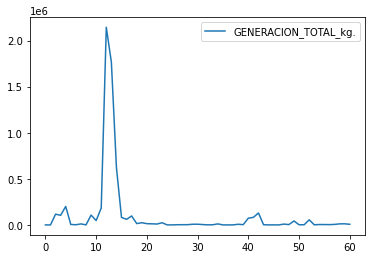

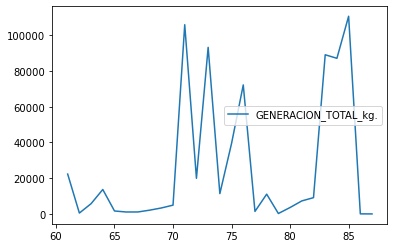

In [85]:
data = df_grp.copy()
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
train.drop('ANO',axis=1,inplace=True)
valid.drop('ANO',axis=1,inplace=True)

#plotting the data
train.plot()
valid.plot()

In [4]:
import re
from unicodedata import normalize

s = "Pingüino: Málãgà ês uñ̺ã cíudãd fantástica y èn Logroño me pica el... moñǫ̝̘̦̞̟̩̐̏̋͌́ͬ̚͡õ̪͓͍̦̓ơ̤̺̬̯͂̌͐͐͟o͎͈̳̠̼̫͂̊"


# -> NFD y eliminar diacríticos
s = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", s), 0, re.I
    )

# -> NFC
#s = normalize( 'NFC', s)

print( s )

Pinguino: Malaga es una ciudad fantastica y en Logroño me pica el... moñoooo
